# Monte Carlo Modeling: Snakes and Ladders

This notebook provides the example code used during a PyData talk on the 17th April 2024

In [1]:
# Import required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from fitter import Fitter, get_common_distributions, get_distributions

## Game Set Up

The following sets up this game board via a dicitonary and initiates storage for the results.

![](snakes-ladders-board-game-vector_600323-522.avif)


In [2]:
# Define a dictionary to contain the playing board
board ={1:1,2:2,3:3,4:56,5:5,6:6,7:7,8:8,9:9,10:10,
        11:11,12:50,13:13,14:55,15:15,16:16,17:17,18:18,19:19,20:20,
        21:21,22:58,23:23,24:24,25:25,26:26,27:27,28:10,29:29,30:30,
        31:31,32:32,33:33,34:34,35:35,36:36,37:3,38:38,39:39,40:40,
        41:79,42:42,43:43,44:44,45:45,46:46,47:47,48:16,49:49,50:50,
        51:51,52:52,53:53,54:88,55:55,56:56,57:57,58:58,59:59,60:60,
        61:61,62:62,63:63,64:64,65:65,66:66,67:67,68:68,69:69,70:70,
        71:71,72:72,73:73,74:74,75:32,76:76,77:77,78:78,79:79,80:80,
        81:81,82:82,83:83,84:84,85:85,86:86,87:87,88:88,89:89,90:90,
        91:91,92:92,93:93,94:71,95:95,96:42,97:97,98:98,99:99,100:100}

## Play a Game
Define a function to play n_games of snakes and ladders with a given board


In [3]:
def play_snakes_and_ladders(game_board, n_games=100):
    """
    Function to play n_games of snakes and ladders with a board 
    defined by the dictionary game_board
    """
    # Define a dictionary to store the experiment results
    game_results = {'game':[], 'throws':[], 'path':[]}
    
    # Play n_games games of snakes and ladders and record data from each outcome
    for game_num in np.arange(1,n_games+1):

        # Iniitate starting conditions for game game_num
        play = True
        square = 0
        game_path = [0]

        while play:   
            # Throw a dice and move along to the new quare
            square += np.random.randint(1,7)
            
            if square < 100:
                square = board[square]
            else:
                square = 100
                play = False

            game_path.append(square)
        
        # Record game outcomes
        # NOTE: minus 1 as starting point on 0th throw is in the game_path list
        game_results['game'].append(game_num)
        game_results['path'].append(game_path)
        game_results['throws'].append(len(game_path)-1) 

    return game_results
        

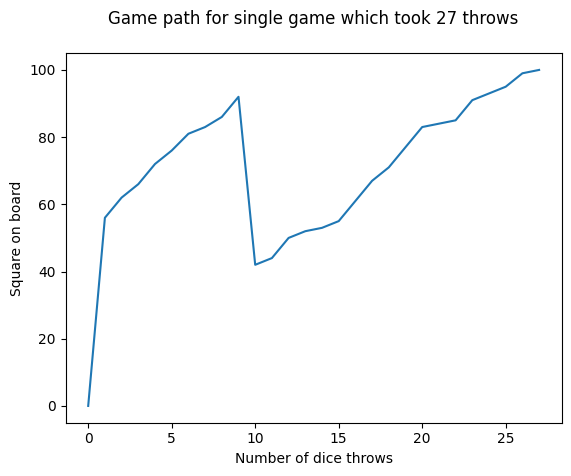

In [4]:
# Play 1 Game
results_1 = play_snakes_and_ladders(board,n_games=1)

# Define x_axis for plot
x_axis =  np.arange(0,len(results_1['path'][0]))

fix, ax = plt.subplots()

# Plot game path of the game with the maximum number of throws
ax.plot (x_axis, results_1['path'][0])
ax.set_xlabel('Number of dice throws')
ax.set_ylabel('Square on board')
ax.set_title('Game path for single game which took %s throws\n' % (results_1['throws'][0]))
plt.show()

## Play Multiple Games

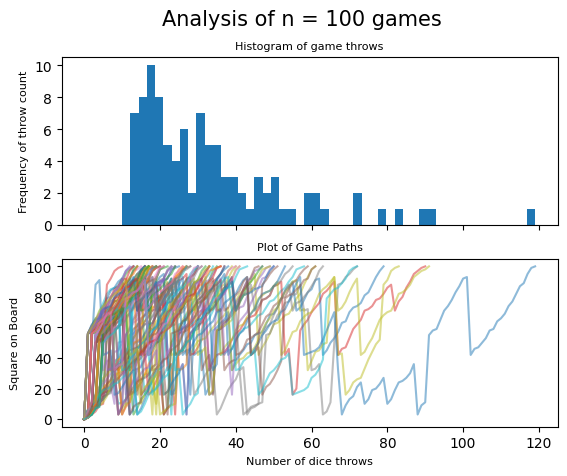

In [5]:
# Play n games
n = 100
results_2 = play_snakes_and_ladders(board,n_games=n)

# Initialise the subplot function using number of rows and columns 
fig, (ax1,ax2) = plt.subplots(2, 1, sharex= True) 

# Plot paths of games on ax2
for i in range(len(results_2['path'])):
     ax2.plot(results_2['path'][i], alpha = 0.5)

# Plot counts of throws over n games on ax1
ax1.hist(results_2['throws'], bins=50, align='mid')

# Format Plot
fig.suptitle('Analysis of n = %s games' % str(n), size = 15)
ax1.set_title('Histogram of game throws',size = 8)
ax2.set_title('Plot of Game Paths',size = 8)
ax1.set_ylabel('Frequency of throw count', size = 8)
ax2.set_ylabel('Square on Board', size = 8)
ax2.set_xlabel('Number of dice throws', size = 8)

plt.show()

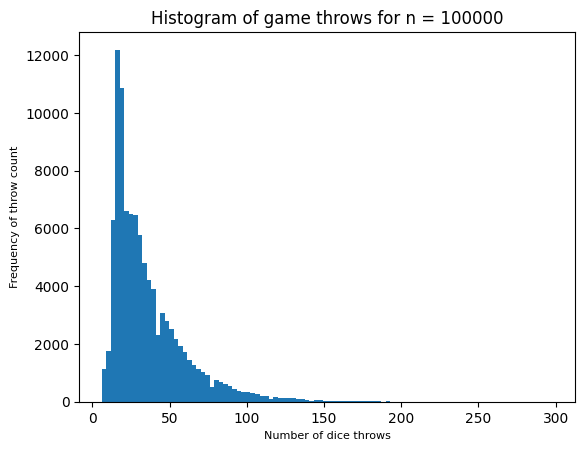

In [6]:
# Play 100000 games
n = 100000
results_3 = play_snakes_and_ladders(board,n_games=n)

# Initialise the subplot function using number of rows and columns 
fig, ax = plt.subplots() 

# Plot counts of throws over n games on ax1
ax.hist(results_3['throws'], bins=100, align='mid')
ax.set_title('Histogram of game throws for n = {}'.format(n))
ax.set_ylabel('Frequency of throw count', size = 8)
ax.set_xlabel('Number of dice throws', size = 8)

# Display PLot
plt.show()

## Path Analysis


In [7]:
# Extract some useful data points (not minus 1 as the starting point of 0 before throw 1 is in the path list)
max_throws = max(results_3['throws'])
min_throws = min(results_3['throws'])

# Provide a summary from the output of the games played
print('Games played: %s ' % n)
print('Maximum number of throws: {}'.format(max_throws))
print('Minimum number of throws: {}'.format(min_throws))
print('Mean number of throws: {:.1f}'.format(np.mean(results_3['throws'])))

Games played: 100000 
Maximum number of throws: 298
Minimum number of throws: 6
Mean number of throws: 36.0


In [8]:
# Find index game(s) which took the maximum number of throws in games_results['throws'] list
max_games = [index for (index, item) in enumerate(results_3['throws']) if item == max_throws]
min_games = [index for (index, item) in enumerate(results_3['throws']) if item == min_throws]

# Find minimum paths taken
min_paths = [results_3['path'][x] for x in min_games]
unique_min_paths = [x for i, x in enumerate(min_paths) if x not in min_paths[:i]]

# Find minimum paths taken
max_paths = [results_3['path'][x] for x in max_games]
unique_max_paths = [x for i, x in enumerate(max_paths) if x not in max_paths[:i]]

# Output Analysis
print('There are %s paths unique paths for the minimum throws of %s has been observed' % (len(unique_min_paths),min_throws))
print('There are %s paths unique paths for the maximum throws of %s has been observed' % (len(unique_max_paths),max_throws))

There are 10 paths unique paths for the minimum throws of 6 has been observed
There are 1 paths unique paths for the maximum throws of 298 has been observed


### Minimum Path Analysis

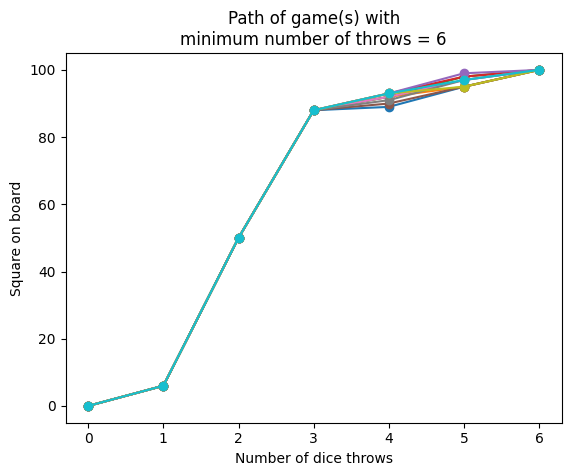

In [9]:
# Define axis for plot
x_axis_min = np.arange(0,min(results_3['throws'])+1)

# Plot game path of the game(s) with the mainimum number of throws
fig, ax = plt.subplots()
for j in range(len(unique_min_paths)):
    ax.plot (x_axis_min,unique_min_paths[j], marker = 'o')
ax.set_xlabel('Number of dice throws')
ax.set_ylabel('Square on board')
ax.set_title('Path of game(s) with\nminimum number of throws = {}'.format(min_throws))
plt.show()

In [10]:
# Display unique Paths
for j in range(len(unique_min_paths)):
    print(unique_min_paths[j])

[0, 6, 50, 88, 89, 95, 100]
[0, 6, 50, 88, 92, 95, 100]
[0, 6, 50, 88, 92, 98, 100]
[0, 6, 50, 88, 93, 98, 100]
[0, 6, 50, 88, 93, 99, 100]
[0, 6, 50, 88, 90, 95, 100]
[0, 6, 50, 88, 92, 97, 100]
[0, 6, 50, 88, 91, 97, 100]
[0, 6, 50, 88, 93, 95, 100]
[0, 6, 50, 88, 93, 97, 100]


### Maximum Path Analysis

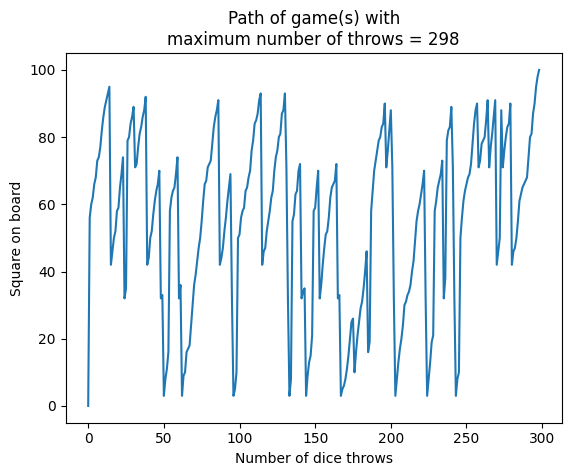

In [11]:
# Define axis for plot
x_axis_max = np.arange(0,max(results_3['throws'])+1)

# Plot game path of the game(s) with the mainimum number of throws
fig, ax = plt.subplots()
for j in range(len(unique_max_paths)):
    ax.plot (x_axis_max,unique_max_paths[j])
ax.set_xlabel('Number of dice throws')
ax.set_ylabel('Square on board')
ax.set_title('Path of game(s) with\nmaximum number of throws = %s' % max_throws)
plt.show()